In [27]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve
import matplotlib.patches as patches


##################머신러닝 모듈 ################

from sklearn.model_selection import train_test_split #사이킷런 import
from sklearn.linear_model import LinearRegression

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)


In [52]:
file_url = "https://media.githubusercontent.com/media/musthave-ML10/data_source/main/salary.csv"

data = pd.read_csv(file_url , skipinitialspace= True) #빈칸 모두 제거

data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [53]:
data['class'].value_counts()

<=50K    37155
>50K     11687
Name: class, dtype: int64

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [55]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [56]:
data.describe(include= 'all') #object형이 포함된 통계정보 출력

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,48842.000000,46043,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [57]:
data['class']

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: class, Length: 48842, dtype: object

In [58]:
data['class'].dtypes

dtype('O')

In [59]:
data['class'] = data['class'].map({ '<=50K' : 0 , '>50K' : 1}) # 숫자로 변환

data['class']

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: class, Length: 48842, dtype: int64

In [60]:
obj_list = []
for i in data.columns : #순회
    if data[i].dtype == 'object' : #데이터타입이 object이면
        obj_list.append(i) #리스트에 변수 이름을 추가

obj_list

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [61]:
for i in obj_list:
    if data[i].nunique() >= 10: #변수의 고윳값이 10보다 크거나 같으면
        print(i , data[i].nunique()) #컬럼명과 고윳값 개수 출력

education 16
occupation 14
native-country 41


In [62]:
data['education'].value_counts() #education grade 별 범주형 데이터 ==> 숫자로 대체



HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [63]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0


In [64]:
np.sort(data['education-num'].unique()) #고윳값을 오름차순으로 확인

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

In [65]:
data[data['education-num'] == 1] # 값이 1인 (True)행만 필터링

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
779,64,Private,Preschool,1,Married-civ-spouse,Handlers-cleaners,Husband,Asian-Pac-Islander,Male,0,0,40,Philippines,0
818,21,Private,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,25,Mexico,0
1029,57,NaN,Preschool,1,Separated,NaN,Not-in-family,White,Male,0,0,40,United-States,0
1059,31,Private,Preschool,1,Never-married,Handlers-cleaners,Not-in-family,Amer-Indian-Eskimo,Male,0,0,25,United-States,0
1489,19,Private,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48079,31,State-gov,Preschool,1,Never-married,Other-service,Not-in-family,White,Male,0,0,24,United-States,0
48316,40,Private,Preschool,1,Married-civ-spouse,Other-service,Husband,White,Male,0,1672,40,Mexico,0
48505,40,Private,Preschool,1,Never-married,Other-service,Not-in-family,White,Female,0,0,20,United-States,0
48640,46,Private,Preschool,1,Married-civ-spouse,Machine-op-inspct,Other-relative,Black,Male,0,0,75,Dominican-Republic,0


In [66]:
data[data['education-num'] == 1]['education'].unique()
#education-num이 1인 데이터들의 education 고윳값 확인

array(['Preschool'], dtype=object)

In [67]:
for i in np.sort(data['education-num'].unique()):
    print(i, data[data['education-num'] ==i]['education'].unique() )

1 ['Preschool']
2 ['1st-4th']
3 ['5th-6th']
4 ['7th-8th']
5 ['9th']
6 ['10th']
7 ['11th']
8 ['12th']
9 ['HS-grad']
10 ['Some-college']
11 ['Assoc-voc']
12 ['Assoc-acdm']
13 ['Bachelors']
14 ['Masters']
15 ['Prof-school']
16 ['Doctorate']


In [68]:
data.drop('education' , axis = 1 , inplace =True)

In [69]:
data['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [70]:
data['native-country'].value_counts() #United-States 값이 압도적으로 큰 비중을 차지한다.

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [71]:
data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [72]:
data.groupby('native-country').mean() #그룹별 평균 계산

,age,education-num,capital-gain,capital-loss,hours-per-week,class
native-country,,,,,,
Cambodia,36.892857,9.392857,697.464286,194.821429,42.035714,0.321429
Canada,44.049451,10.692308,1233.505495,131.159341,40.406593,0.346154
China,41.852459,11.262295,1407.737705,170.655738,38.262295,0.295082
Columbia,39.458824,9.258824,125.364706,65.247059,39.929412,0.047059
Cuba,46.355072,9.391304,470.543478,62.717391,40.101449,0.246377
Dominican-Republic,37.970874,7.320388,1064.456311,39.029126,41.621359,0.048544
Ecuador,37.666667,9.244444,328.288889,0.000000,39.266667,0.133333
El-Salvador,33.380645,6.722581,392.761290,36.367742,36.361290,0.070968
England,40.527559,11.110236,1076.551181,108.913386,41.937008,0.370079


In [73]:
data.groupby('native-country').mean().sort_values('class')

,age,education-num,capital-gain,capital-loss,hours-per-week,class
native-country,,,,,,
Holand-Netherlands,32.000000,10.000000,0.000000,2205.000000,40.000000,0.000000
Guatemala,32.090909,6.306818,167.875000,18.113636,38.715909,0.034091
Outlying-US(Guam-USVI-etc),38.826087,10.043478,0.000000,76.608696,41.347826,0.043478
Columbia,39.458824,9.258824,125.364706,65.247059,39.929412,0.047059
Dominican-Republic,37.970874,7.320388,1064.456311,39.029126,41.621359,0.048544
Mexico,33.635121,6.026288,415.954784,32.656151,40.213460,0.049422
Nicaragua,36.285714,9.000000,138.653061,69.938776,36.938776,0.061224
El-Salvador,33.380645,6.722581,392.761290,36.367742,36.361290,0.070968
Trinadad&Tobago,39.259259,8.962963,116.185185,156.518519,38.888889,0.074074


In [76]:
country_group = data.groupby('native-country').mean()['class']
country_group=  country_group.reset_index() #인덱스를 변수로 불러냄

country_group

,native-country,class
0,Cambodia,0.321429
1,Canada,0.346154
2,China,0.295082
3,Columbia,0.047059
4,Cuba,0.246377
5,Dominican-Republic,0.048544
6,Ecuador,0.133333
7,El-Salvador,0.070968
8,England,0.370079
9,France,0.421053


In [77]:
data = data.merge(country_group , on = 'native-country' , how= 'left')
#data와 country_group을 native_country 기준으로 결합(left join)
data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class_x,class_y
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0.243977
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,0.243977
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0,0.243977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0.243977
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0.243977
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0.243977
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0.243977


In [78]:
data.drop('native-country' , axis = 1 , inplace =True) #변수 제거
data = data.rename(columns = {'class_x' : 'class' , 'class_y' : 'native-country'}) # 변수 이름 반환
data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,class,native-country
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,0,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,0,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1,0.243977
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1,0.243977
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,0,0.243977
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,0,0.243977
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,1,0.243977
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,0,0.243977
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,0,0.243977


In [79]:
data.isna().mean() #결측치 비율 확인

age               0.000000
workclass         0.057307
education-num     0.000000
marital-status    0.000000
occupation        0.057512
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
class             0.000000
native-country    0.017546
dtype: float64

In [80]:
data['native-country'] = data['native-country'].fillna(-99) #native-country의 경우 각 국가별 class의 평균값으로 대체한 상황
#트리 기반 모델에서는 결측치를 임의의 숫자로 채워도 괜찮다.

In [81]:
data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [82]:
data['workclass'] = data['workclass'].fillna('Private')
#결측치를 Private(특정 값이 대부분을 차지하는 경우라면 해당 값으로 결측치를 채워주는 방법으로 대체)

In [83]:
data['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [84]:
data['occupation'] = data['occupation'].fillna('Unknown')
# 어떤 특정값이 압도적으로 많다고 하기가 어렵다. 이런 경우에는 별도의 텍스트 'Unknown'으로 채운다.

In [85]:
data = pd.get_dummies(data , drop_first=True) #더미 변수로 변환
data

,age,education-num,capital-gain,capital-loss,hours-per-week,class,native-country,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,25,7,0,0,40,0,0.243977,0,0,1,...,0,0,1,0,0,0,1,0,0,1
1,38,9,0,0,50,0,0.243977,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,28,12,0,0,40,1,0.243977,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,44,10,7688,0,40,1,0.243977,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,18,10,0,0,30,0,0.243977,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,38,0,0.243977,0,0,1,...,0,0,0,0,1,0,0,0,1,0
48838,40,9,0,0,40,1,0.243977,0,0,1,...,0,0,0,0,0,0,0,0,1,1
48839,58,9,0,0,40,0,0.243977,0,0,1,...,0,0,0,1,0,0,0,0,1,0
48840,22,9,0,0,20,0,0.243977,0,0,1,...,0,0,1,0,0,0,0,0,1,1


In [103]:
data['marital-status_Married-civ-spouse']

0        0
1        1
2        1
3        1
4        0
        ..
48837    1
48838    1
48839    0
48840    0
48841    1
Name: marital-status_Married-civ-spouse, Length: 48842, dtype: uint8

In [86]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(data.drop('class',axis =1 )  , data['class'] , test_size= 0.4 , random_state= 100)

In [89]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier() # 모델 객체 생성
model.fit(X_train , y_train) # 학습
pred = model.predict(X_test) # 예측

from sklearn.metrics import accuracy_score

accuracy_score(y_test , pred) # 정확도 계산



0.8160413574243742

In [91]:
- (0.25*np.log2(0.25)  + 0.75*np.log2(0.75))

0.8112781244591328

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train , y_train)
train_pred = model.predict(X_train) #훈련셋 예측
test_pred = model.predict(X_test) #시험셋 예측
print('Train score : ' , accuracy_score(y_train , train_pred) , 'Test score : ' , accuracy_score(y_test , test_pred)) # 훈련셋 , 시험셋의 정확도 평가

In [ ]:
model = DecisionTreeClassifier(max_depth= 7) #모델 객체 생성
model.fit(X_train , y_train) #학습
train_pred = model.predict(X_train) #훈련 셋 예측
test_pred = model.predict(X_test) # 시험 셋 예측
print('Train score : ' , accuracy_score(y_train , train_pred) , 'Test score : ' , accuracy_score(y_test , test_pred)) # 훈련셋 , 시험셋의 정확도 평가

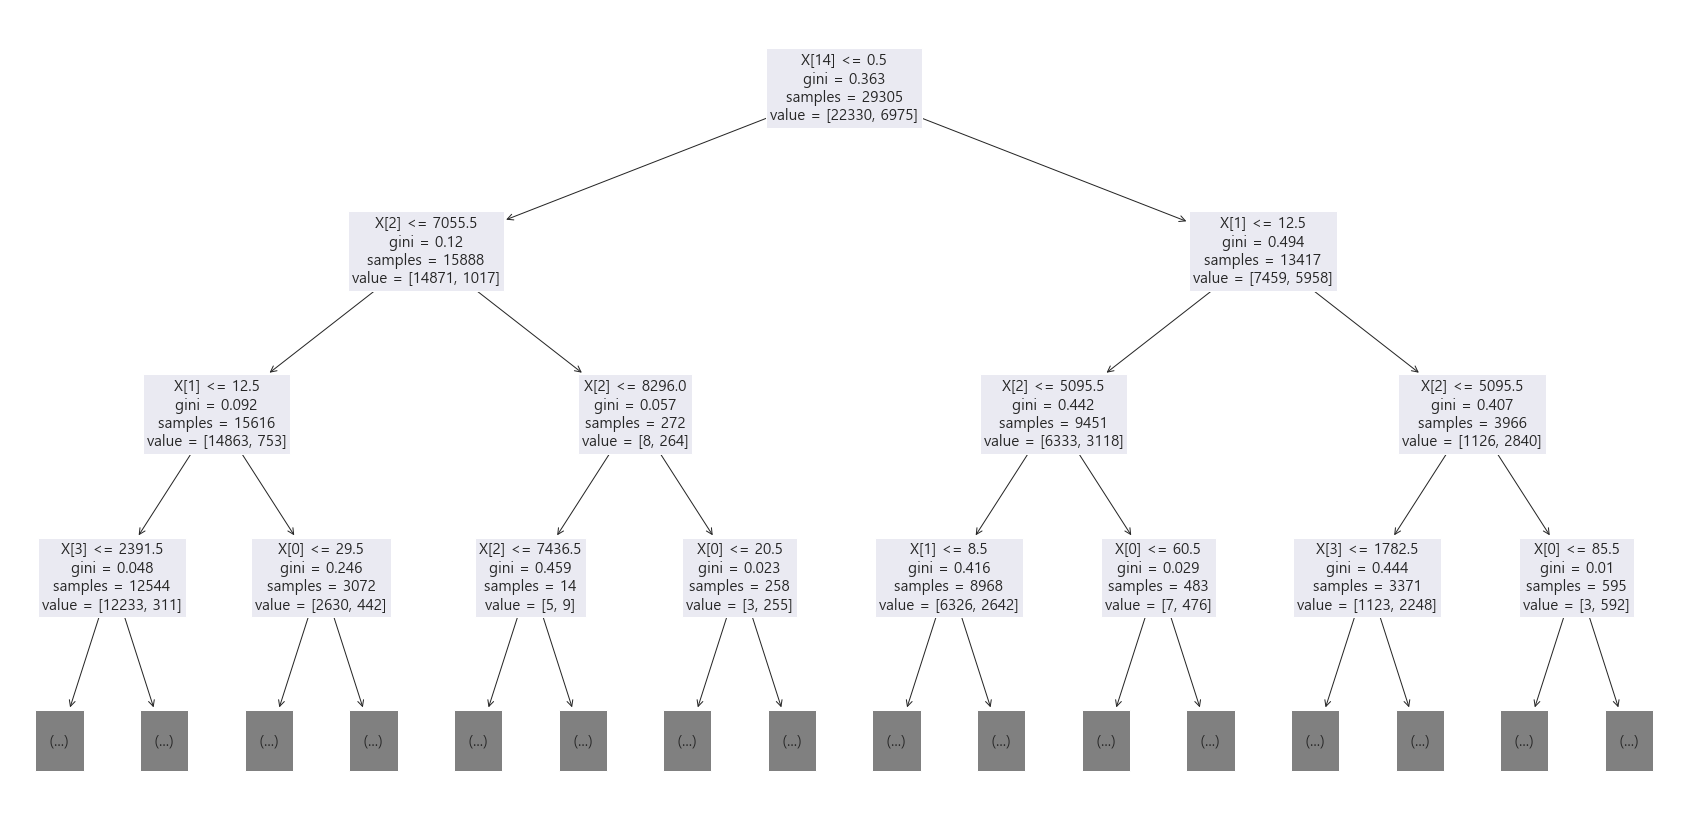

In [100]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize =  (30,15)) # 그래프 크기 설정

ax = plot_tree(model , max_depth= 3 , fontsize = 15) # 트리 그래프 출력

plt.show()

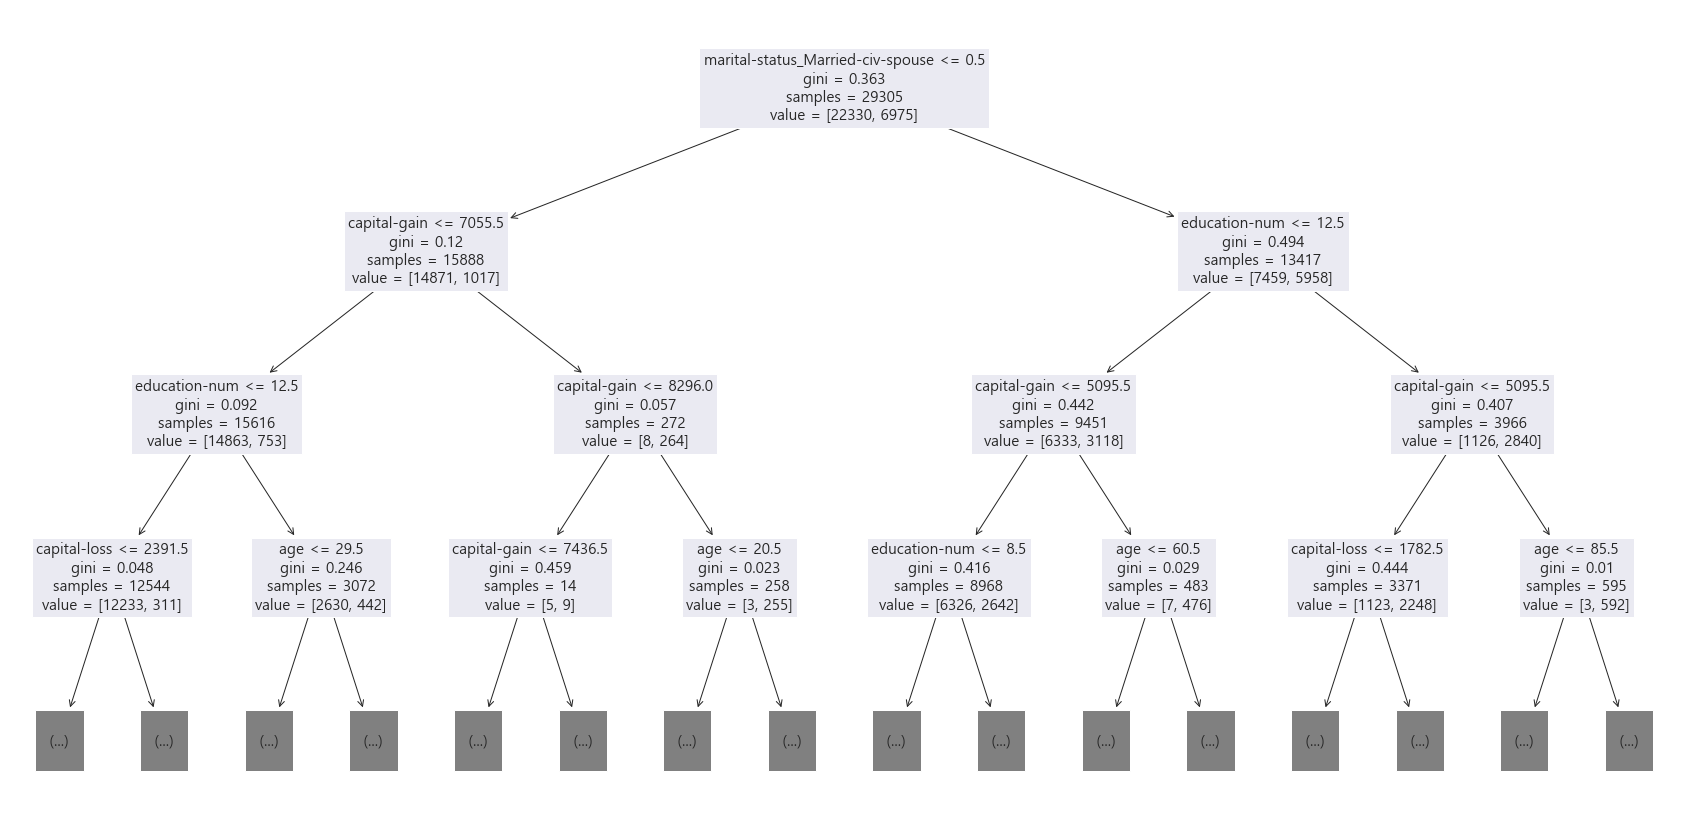

In [101]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize =  (30,15)) # 그래프 크기 설정

ax = plot_tree(model , max_depth= 3 , fontsize = 15 , feature_names= X_train.columns) # 트리 그래프 출력

plt.show()